Lab 2 Question 2

github repository: https://github.com/spsoofbaf/UNB_ComputerVision


Transformation matrix = 

[[ 1.39236201e+00 -2.97969648e-02 -2.57304402e+02]
 [ 4.81521964e-01  1.51544030e+00 -3.20990974e+02]
 [ 1.35350818e-03 -2.38908607e-05  2.78460000e-01]]

Transformation matrix (opencv) = 

[[ 5.00022233e+00 -1.07005733e-01 -9.24026411e+02]
 [ 1.72923197e+00  5.44221962e+00 -1.15273644e+03]
 [ 4.86069103e-03 -8.57950698e-05  1.00000000e+00]]


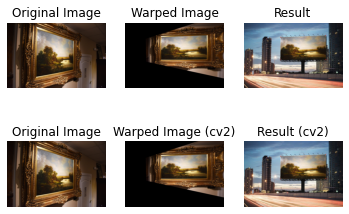

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform, img_as_ubyte
from PIL import ImageDraw, Image
import cv2

src_image = Image.open("Highway billboard.jpg")
src_image_cv = src_image.copy()
dst_image = Image.open("Oil painting.jpg")

src_image_width = src_image.size[0]
dst_image_width = dst_image.size[0]
src_image_height = src_image.size[1]

dst_image = dst_image.resize((src_image_width, src_image_height))

R = src_image_width / dst_image_width

p1_dst = (R * 634, R * 152)
p2_dst = (R * 1374, R * 391)
p3_dst = (R * 1369, R * 987)
p4_dst = (R * 606, R * 1136)

p1_src = (333, 138)
p2_src = (743, 121)
p3_src = (744, 341)
p4_src = (329, 343)

src = np.array([p1_src, p2_src, p3_src, p4_src])
dst = np.array([p1_dst, p2_dst, p3_dst, p4_dst])

# Calculating the transformation matrix
tform = transform.ProjectiveTransform()
tform.estimate(src, dst)
print("\nTransformation matrix = \n")
print(tform.params)

# Warping the image
dst_image_array = np.array(dst_image)
warped_image_array = transform.warp(dst_image_array, tform, output_shape=(src_image_height, src_image_width))
warped_image = Image.fromarray(img_as_ubyte(warped_image_array))

# Defining the mask
mask_im = Image.new("L", src_image.size, 0)
draw = ImageDraw.Draw(mask_im)
draw.polygon((p1_src, p2_src, p3_src, p4_src), outline=1, fill=255)

# Pasting the image
src_image.paste(warped_image, (0, 0), mask=mask_im)

# Using opencv library
src_cv = np.float32([p1_src, p2_src, p3_src, p4_src])
dst_cv = np.float32([p1_dst, p2_dst, p3_dst, p4_dst])
tform_cv = cv2.getPerspectiveTransform(src_cv, dst_cv)
print("\nTransformation matrix (opencv) = \n")
print(tform_cv)

warped_image_cv = cv2.warpPerspective(dst_image_array, np.linalg.inv(tform_cv), (src_image_width, src_image_height))

src_image_array = np.array(src_image_cv)
mask_im_array = np.array(mask_im)

warped_image_masked = cv2.bitwise_and(warped_image_cv, warped_image_cv, mask=mask_im_array)
src_image_masked = cv2.bitwise_and(src_image_array, src_image_array, mask=~mask_im_array)

result = cv2.add(src_image_masked, warped_image_masked)

# Plotting the result
fig, ax = plt.subplots(nrows=2, ncols=3)

ax[0][0].imshow(dst_image, cmap="gray")
ax[0][0].axis('off')
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(warped_image, cmap="gray")
ax[0][1].axis('off')
ax[0][1].title.set_text('Warped Image')

ax[0][2].imshow(src_image, cmap="gray")
ax[0][2].axis('off')
ax[0][2].title.set_text('Result')

ax[1][0].imshow(dst_image, cmap="gray")
ax[1][0].axis('off')
ax[1][0].title.set_text('Original Image')

ax[1][1].imshow(warped_image_cv, cmap="gray")
ax[1][1].axis('off')
ax[1][1].title.set_text('Warped Image (cv2)')

ax[1][2].imshow(result, cmap="gray")
ax[1][2].axis('off')
ax[1][2].title.set_text('Result (cv2)')

plt.show()
